# 1. Introduction

Nikki Satmaka - Batch 11

## Description

Dataset is taken from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn)

Context:

This dataset contains the information related to customers of a telco company that provided home phone and Internet services to 7043 customers in California in Q3

1. `customerID` : A unique ID that identifies each customer.
1. `gender` : The customer’s gender: Male, Female
1. `SeniorCitizen` : Indicates if the customer is 65 or older: 1 = Senior Citizen, 0 = Not Senior Citizen
1. `Partner` : Indicates if the customer is married: Yes, No
1. `Dependents` : Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
1. `tenure` :  Indicates the total amount of months that the customer has been with the company.
1. `PhoneService` : Indicates if the customer subscribes to home phone service with the company: Yes, No
1. `MultipleLines` : Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No, No phone service
1. `InternetService` : Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic
1. `OnlineSecurity` : Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No, No internet service
1. `OnlineBackup` : Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No, No internet service
1. `DeviceProtection` : Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No, No internet service
1. `TechSupport` : Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No, No internet service
1. `StreamingTV` : Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No, No internet service
1. `StreamingMovies` : Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No, No internet service
1. `Contract` : Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
1. `PaperlessBilling` : Indicates if the customer has chosen paperless billing: Yes, No
1. `PaymentMethod` : Indicates how the customer pays their bill: Bank Transfer, Credit Card, Electronic Check, Mailed Check
1. `MonthlyCharges` : Indicates the customer’s current total monthly charge for all their services from the company.
1. `TotalCharges` : Indicates the customer’s total charges.
1. `Churn` : Yes = the customer left the company. No = the customer remained with the company.

### Objective

- Predict whether a customer will churn and stop using the services

### Problem Statement

- What features are going to be useful as predictors?

# 2. Importing Libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Useful functions
from packages.checker import check_missing
from packages.outlier_handling import outlier_summary
from packages.imputation_handling import impute_total_charges
from packages.imputation_handling import impute_no_phone_internet
from packages.visualization import kdeplot, plot_loss, plot_acc

import joblib

import warnings
warnings.filterwarnings('ignore')

# For Data Preprocessing
from imblearn.over_sampling import SMOTENC
from sklearn.compose import ColumnTransformer

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Neural Network
import tensorflow as tf
from tensorflow import keras

# Evaluate Classification Models
from sklearn.metrics import classification_report

pd.set_option('display.precision', 2)

sns.set_theme(style='darkgrid', palette='Set1')

# set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline

# 3. Data Loading

In [2]:
# load dataset
df_ori = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df_ori.copy()

# display the first 5 entries of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# display the last 5 entries of the data
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Data Understanding

In [4]:
# check dataset shape
df.shape

(7043, 21)

There are 7043 instances and 21 columns of data

In [5]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


This is weird. Why would `TotalCharges` have `object` as a dtype? It should be similar to `MonthlyCharges` which is `float64`\
Let's see the unique values

In [6]:
# check unique values for `TotalCharges` feature
print(df['TotalCharges'].unique())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


Glancing at the unique values, it's clear that they're numbers, but quoted as string.\
Let's convert `TotalCharges` to `number` and pass any errors as `NaN`

In [7]:
# convert `TotalCharges` to numeric and pass any non-numeric values as NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Let's check the info again

In [8]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# check duplicate values in dataset
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Great! There are no duplicated instances

In [10]:
# check missing values in dataset
check_missing(df)

,feats,tot_missing,tot_missing_pct
0,TotalCharges,11,0.16


Seems like those 11 missing values were the cause of that `object` data type\
We've got 0.16% missing values in `TotalCharges`

## Basic Characteristics of the Dataset

In [11]:
# check basic stats for numerical features
df.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
SeniorCitizen,7043.0,0.16,0.37,0.00,0.00,1.00
tenure,7043.0,32.37,24.56,0.00,29.00,72.00
MonthlyCharges,7043.0,64.76,30.09,18.25,70.35,118.75
TotalCharges,7032.0,2283.30,2266.77,18.80,1397.47,8684.80


In [12]:
# check basic stats for features with object dtypes
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [13]:
# check the cardinality of each nominal and ordinal features
print("Nominal and ordinal features cardinality:")
for col in df.columns:
    if df[col].nunique() < 20:
        print(col, ':', df[col].nunique(), 'unique values \n', np.sort(df[col].unique()))
        print('-' * 100)

Nominal and ordinal features cardinality:
gender : 2 unique values 
 ['Female' 'Male']
----------------------------------------------------------------------------------------------------
SeniorCitizen : 2 unique values 
 [0 1]
----------------------------------------------------------------------------------------------------
Partner : 2 unique values 
 ['No' 'Yes']
----------------------------------------------------------------------------------------------------
Dependents : 2 unique values 
 ['No' 'Yes']
----------------------------------------------------------------------------------------------------
PhoneService : 2 unique values 
 ['No' 'Yes']
----------------------------------------------------------------------------------------------------
MultipleLines : 3 unique values 
 ['No' 'No phone service' 'Yes']
----------------------------------------------------------------------------------------------------
InternetService : 3 unique values 
 ['DSL' 'Fiber optic' 'No']
-------

Let's cover some basic stats of the features in the train set.
- `customerID`
    - Index
    - I'm going to drop this feature early on because it functions as an index and do not have any use as a predictor
- `gender`
    - Nominal feature
    - Most customers are Male
    - Two unique values
- `SeniorCitizen`
    - Nominal feature
    - Two unique values
    - Since it's either 0 or 1 and the median of the data is 0, the mode is also 0
    - Most customers are not senior citizens
- `Partner`
    - Nominal feature
    - Two unique values
    - Most customers do not have a partner
- `Dependents`
    - Nominal feature
    - Two unique values
    - Most customers do not have any dependents
- `tenure`
    - Numerical feature
    - Ranges from 0 to 72
    - Mean is higher than the median
    - Might be right skewed
- `PhoneService`
    - Nominal feature
    - Two unique values
    - Most customers have a phone service
- `MultipleLines`
    - Nominal feature
    - Three unique values
    - Most customers have do not have multiple lines
- `InternetService`
    - Nominal feature
    - Three unique values
    - Most customers have fiber optic internet service
- `OnlineSecurity`
    - Nominal feature
    - Three unique values
    - Most customers have do not have additional online security service
- `OnlineBackup`
    - Nominal feature
    - Three unique values
    - Most customers have do not have additional online backup service
- `DeviceProtection`
    - Nominal feature
    - Three unique values
    - Most customers have do not have additional device protection service
- `TechSupport`
    - Nominal feature
    - Three unique values
    - Most customers have do not have additional tech support service
- `StreamingTV`
    - Nominal feature
    - Three unique values
    - Most customers have do not have tv streaming service
- `StreamingMovies`
    - Nominal feature
    - Three unique values
    - Most customers have do not have movie streaming service
- `Contract`
    - Nominal feature
    - Three unique values
    - Most customers are on a month-to-month contract
- `PaperlessBilling`
    - Nominal feature
    - Two unique values
    - Most customers chose paperless billing
- `PaymentMethod`
    - Nominal feature
    - Four unique values
    - Most customers pay using electronic check
- `MonthlyCharges`
    - Numerical feature
    - Ranges from 18.25 to 118.75 per month
    - Mean is lower than the median
    - Might be left skewed
- `TotalCharges`
    - Numerical feature
    - Ranges from 18.80 to 8684.80
    - Mean is significantly higher than the median
    - Might be right skewed
- `Churn`
    - Target label

## Data Preparation

Drop `customerID` because it's an index

In [14]:
# drop `customerID` from the dataset
df = df.drop(['customerID'], axis=1)

## Check for Dataset Imbalance

Check whether the target variable of the dataset is balance

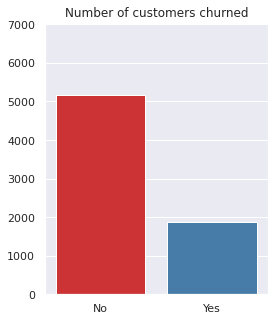

In [15]:
# check for imbalance in target variable
plt.figure(figsize=(4,5))
sns.countplot(data=df, x='Churn')
plt.title('Number of customers churned')
plt.xlabel(None)
plt.ylabel(None)
plt.ylim(0, df.shape[0])

plt.show()

We can see that most customers do not churn and the percentage of churned clients is less than 30% of the dataset.\
That means our dataset is imbalance and we need to stratify when splitting

## Splitting Dataset

We need to split the dataset into train and test sets before we do any EDA.\
We do our EDA on the train set so as to not have any bias towards the whole dataset.

### Split train and test set


Since the target variable is imbalanced, we use stratified sampling

In [16]:
# we use stratified sampling to ensure that the distribution of the target variable is balanced
df_train_valid, df_test = train_test_split(
    df,
    test_size=0.20,
    random_state=42,
    stratify=df['Churn']
)

print('df_train_valid Size:', df_train_valid.shape)
print('df_test Size:', df_test.shape)

df_train_valid Size: (5634, 20)
df_test Size: (1409, 20)


### Split train and validation set


Since the target variable is imbalanced, we use stratified sampling

In [17]:
# we use stratified sampling to ensure that the distribution of the target variable is balanced
df_train, df_valid = train_test_split(
    df_train_valid,
    test_size=0.20,
    random_state=42,
    stratify=df_train_valid['Churn']
)

print('df_train Size:', df_train.shape)
print('df_valid Size:', df_valid.shape)

df_train Size: (4507, 20)
df_valid Size: (1127, 20)


In [18]:
# backup the train set that we are gonna perform EDA on
df_train_ori = df_train.copy()

# 4. Exploratory Data Analysis

I'm going to create a dummy variable for the target label to make the EDA easier.
So that I can call thu numeric dummy of the target, with `0 being Not Churned and 1 being Churned`

In [19]:
# create a dummy feature for 'Churn'
df_train = pd.concat([df_train, pd.get_dummies(df_train['Churn'], prefix='Churn', drop_first=True)], axis=1)

## Basic Customer Information

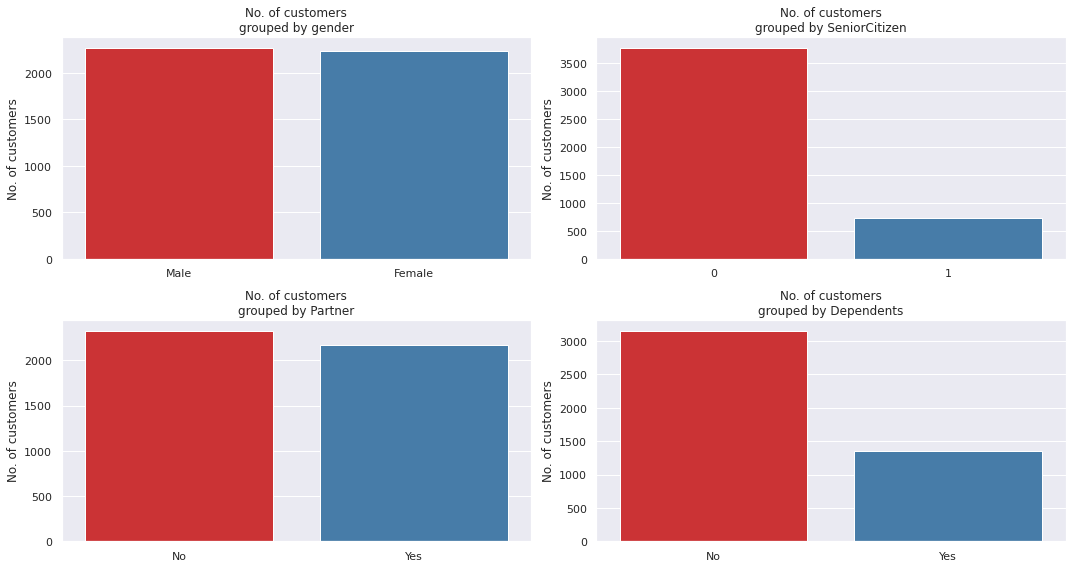

In [20]:
# plot number of customers grouped by basic information
plt.figure(figsize=(15, 8))
for i, col in enumerate(['gender', 'SeniorCitizen', 'Partner', 'Dependents']):
    sns.countplot(
        data=df_train,
        x=col, order=df_train[col].value_counts().index, ax=plt.subplot(2, 2, i+1)
    )
    plt.title(f'No. of customers\ngrouped by {col}')
    plt.xlabel(None)
    plt.ylabel("No. of customers")


plt.tight_layout()
plt.show()

There's about the same number of male and female customers.\
There are more Non-Senior citizens than Seniors\
The number of customers who have a partner and those who don't are about equal\
Most customers do not have any dependents

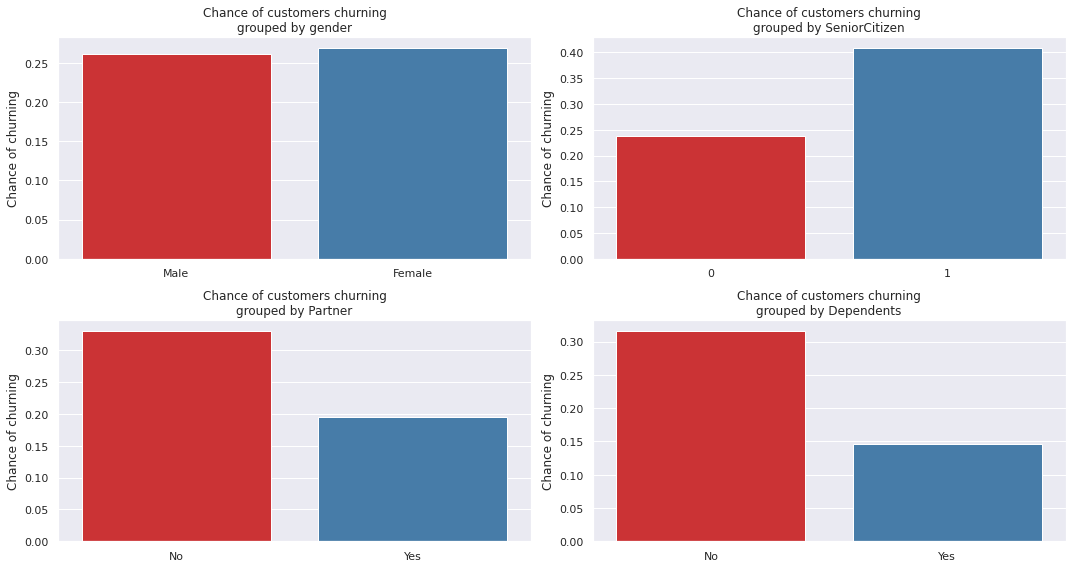

In [21]:
# plot chance of customers churning grouped by basic information
plt.figure(figsize=(15, 8))
for i, col in enumerate(['gender', 'SeniorCitizen', 'Partner', 'Dependents']):
    sns.barplot(
        data=df_train,
        x=col, y='Churn_Yes',
        order=df_train[col].value_counts().index,
        ci=None,
        ax=plt.subplot(2, 2, i+1)
    )
    plt.title(f'Chance of customers churning\ngrouped by {col}')
    plt.xlabel(None)
    plt.ylabel("Chance of churning")

plt.tight_layout()
plt.show()

It seems like both male and female have about equal chance of stopping the subscription\
Though there are only a few Senior-citizen customers, they have a higher chance of stopping their subscriptions, about 40% of them

## Base Services

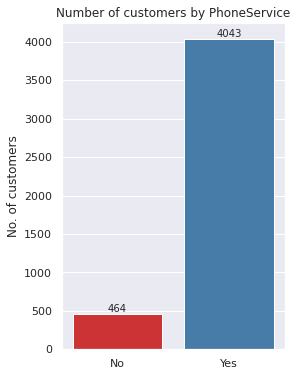

In [22]:
# plot number of customers by PhoneService
plt.figure(figsize=(4, 6))
ax = sns.countplot(data=df_train, x='PhoneService', order=df_train['PhoneService'].value_counts().index[::-1])
plt.title(f'Number of customers by PhoneService')
plt.xlabel(None)
plt.ylabel('No. of customers')

ax.bar_label(ax.containers[0])

plt.show()

Most of our customers subscribe to a Phone Service. For those few that do not, they should be subscribing to an Internet Service, otherwise they wouldn't be a customer at all

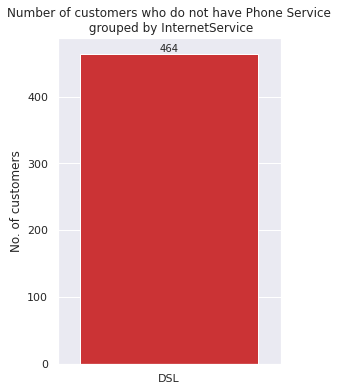

In [23]:
# plot number of customers who do not have PhoneService grouped by InternetService
plt.figure(figsize=(4, 6))
ax = sns.countplot(data=df_train[df_train['PhoneService'] == 'No'], x='InternetService')
plt.title(f'Number of customers who do not have Phone Service\n grouped by InternetService')
plt.xlabel(None)
plt.ylabel('No. of customers')

ax.bar_label(ax.containers[0])

plt.show()

They all subscribe to the DSL Internet Service

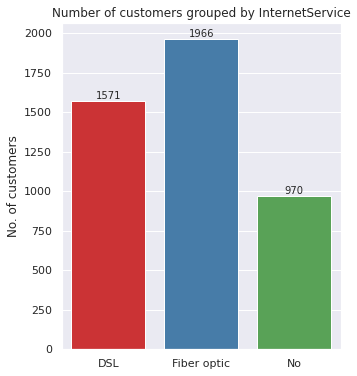

In [24]:
# plot number of customers by InternetService
plt.figure(figsize=(5, 6))
ax = sns.countplot(data=df_train, x='InternetService')
plt.title(f'Number of customers grouped by InternetService')
plt.xlabel(None)
plt.ylabel('No. of customers')

ax.bar_label(ax.containers[0])

plt.show()

Seems like most of the customers subscribe to Fiber optic.

I want to see how many customers subscribe to both phone service and internet service

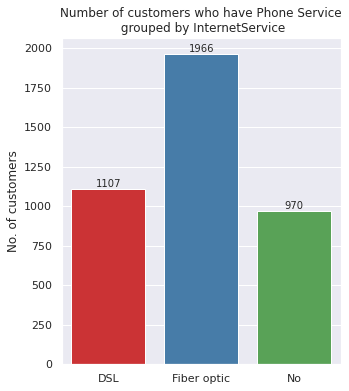

In [25]:
# plot number of customers who have PhoneService grouped by InternetService
plt.figure(figsize=(5, 6))
ax = sns.countplot(data=df_train[df_train['PhoneService'] == 'Yes'], x='InternetService')
plt.title(f'Number of customers who have Phone Service\n grouped by InternetService')
plt.xlabel(None)
plt.ylabel('No. of customers')

ax.bar_label(ax.containers[0])

plt.show()

Seems like they mostly subscribe to Fiber optic. Since the price of fiber optic is more expensive than the DSL, and they also subscribe to a phone service, their monthly charges must be high. But seeing no change for the bar of fiber optic, this also might be caused by a packaged deal, where they get a free phone service when they subscribe to the fiber optic internet service

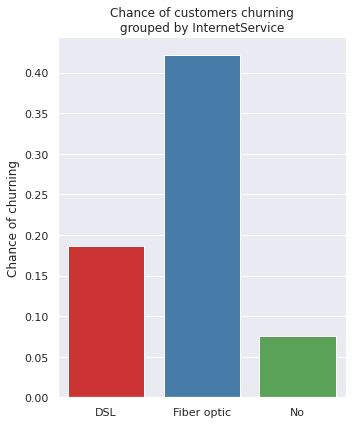

In [26]:
# plot chance of customers churning grouped by InternetService
plt.figure(figsize=(5, 6))
sns.barplot(
    data=df_train,
    x='InternetService', y='Churn_Yes',
    ci=None
)
plt.title(f'Chance of customers churning\ngrouped by InternetService')
plt.xlabel(None)
plt.ylabel("Chance of churning")

plt.tight_layout()
plt.show()

Though they likely pay higher for their subscriptions and bring more revenues for the company, customers who use Fiber optic have about double the chance of churning compared to customers who use DSL

## Multiple Lines

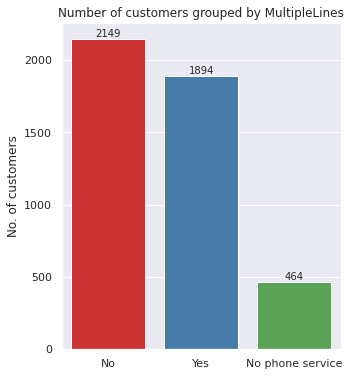

In [27]:
# plot number of customers grouped by MultipleLines
plt.figure(figsize=(5, 6))
ax = sns.countplot(data=df_train, x='MultipleLines')
plt.title(f'Number of customers grouped by MultipleLines')
plt.xlabel(None)
plt.ylabel('No. of customers')

ax.bar_label(ax.containers[0])

plt.show()

Ignoring the customers who do not have a phone service, most customers do not have multiple lines, and instead only have a single phone line.\
I do feel like this `No phone service` category is a redundancy though, as customers will surely have no multiple lines if they do not have a phone service.

I wonder if these customers who subscribe to multiple phone lines would also choose the more expensive, higher quality Fiber optic as their internet service.\
I think these must be customers who are well-off

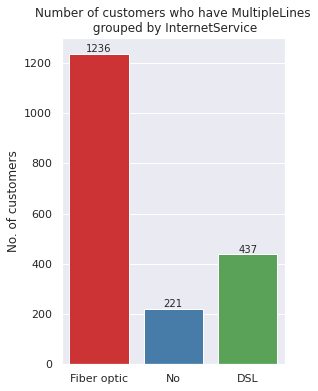

In [28]:
# plot number of customers who have MultipleLines grouped by InternetService
plt.figure(figsize=(4, 6))
ax = sns.countplot(data=df_train[df_train['MultipleLines'] == 'Yes'], x='InternetService')
plt.title(f'Number of customers who have MultipleLines\n grouped by InternetService')
plt.xlabel(None)
plt.ylabel('No. of customers')

ax.bar_label(ax.containers[0])

plt.show()

It seems that my hunch was correct and these are well-off customers who want the best of the best

## Additional Services

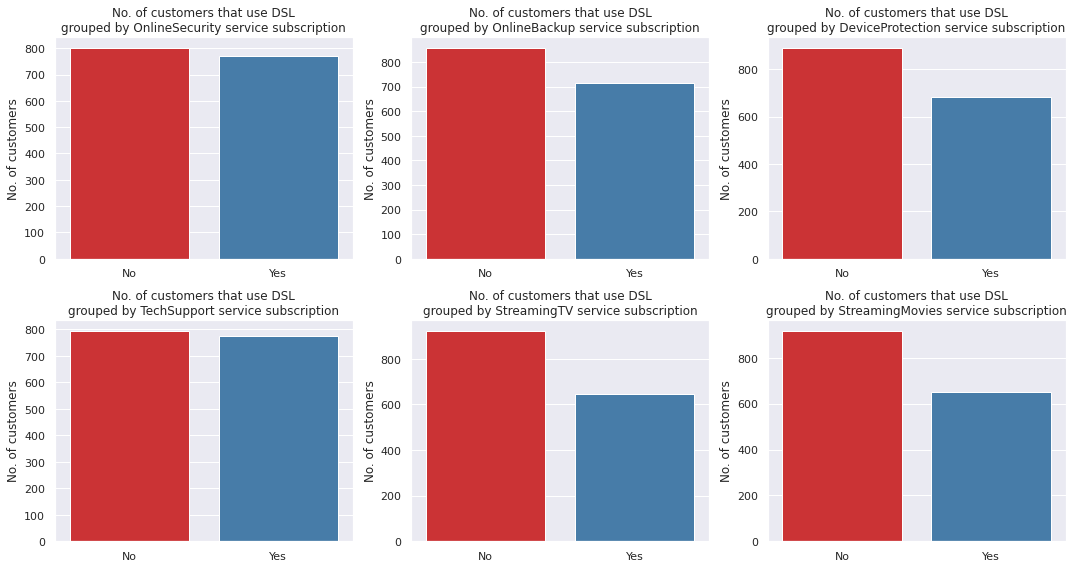

In [29]:
# plot number of customers that use DSL grouped by additional services subscription
plt.figure(figsize=(15, 8))
for i, col in enumerate(["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]):
    sns.countplot(
        data=df_train[df_train['InternetService'] == 'DSL'],
        x=col, order=df_train[col].value_counts().index[:-1],
        ax=plt.subplot(2, 3, i+1)
    )
    plt.title(f'No. of customers that use DSL\ngrouped by {col} service subscription')
    plt.xlabel(None)
    plt.ylabel("No. of customers")

plt.tight_layout()
plt.show()

Seems like most people who use DSL do not subscribe to additional services.\
However, we do have to note that the number of customers who subscribe to online security and tech support are also about equal to those who don't

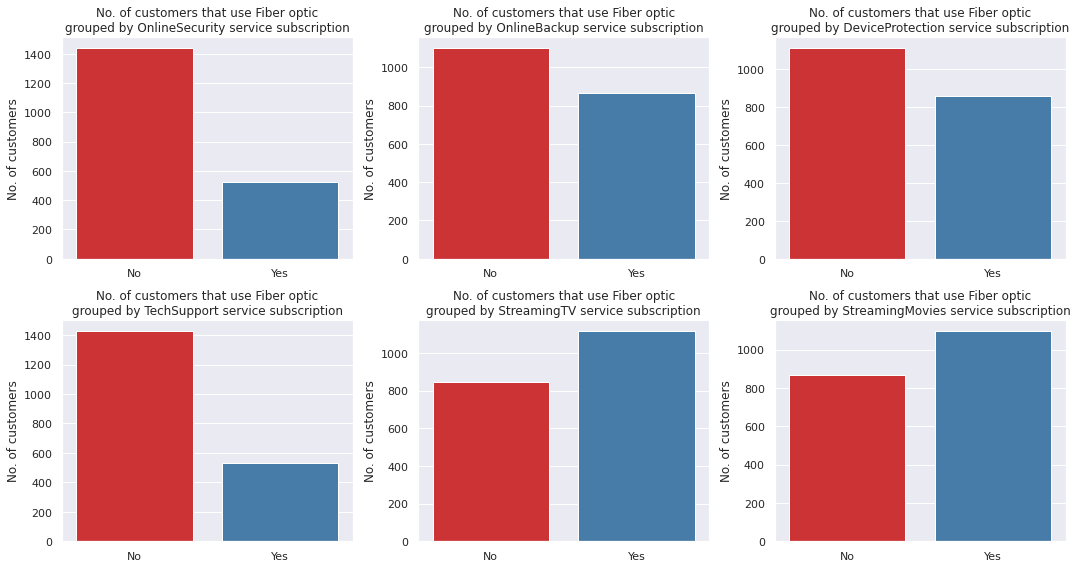

In [30]:
# plot number of customers that use Fiber optic grouped by additional services subscription
plt.figure(figsize=(15, 8))
for i, col in enumerate(["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]):
    sns.countplot(
        data=df_train[df_train['InternetService'] == 'Fiber optic'],
        x=col, order=df_train[col].value_counts().index[:-1],
        ax=plt.subplot(2, 3, i+1)
    )
    plt.title(f'No. of customers that use Fiber optic\ngrouped by {col} service subscription')
    plt.xlabel(None)
    plt.ylabel("No. of customers")

plt.tight_layout()
plt.show()

Contrary to the DSL users, most Fiber optic users do not subscribe to online security and tech support. Is this because Fiber optic is less prone to cyber attacks, so they opted out of those additional services?\
We can also see that these customers tend to subscribe to third-party streaming TV and streaming Movies services. This might be because they have faster, more reliable internet connection and they're also more well-off. So they want better entertainment

## Payment Method

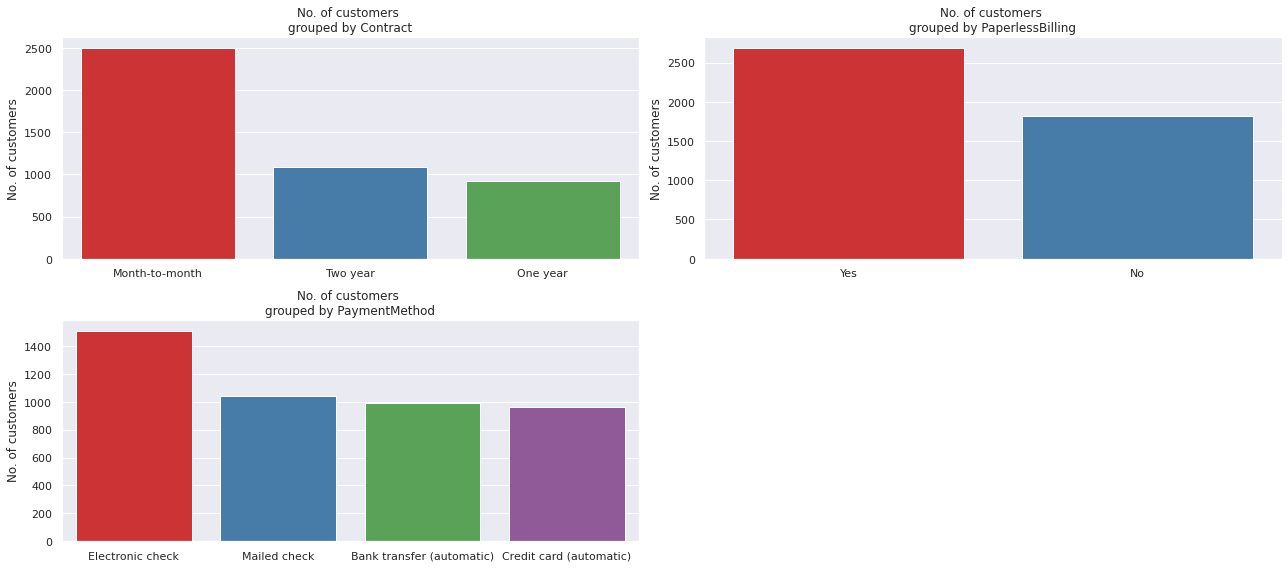

In [31]:
# plot number of customers grouped by additional services subscription
plt.figure(figsize=(18, 8))
for i, col in enumerate(['Contract', 'PaperlessBilling', 'PaymentMethod']):
    sns.countplot(
        data=df_train,
        x=col, order=df_train[col].value_counts().index,
        ax=plt.subplot(2, 2, i+1)
    )
    plt.title(f'No. of customers \ngrouped by {col}')
    plt.xlabel(None)
    plt.ylabel("No. of customers")

plt.tight_layout()
plt.show()

Most people are on a month-to-month contract. I don't think this is a good way to retain customers.\
Most people use paperless billing\
Most people use electronic check as their payment method. I think that automatic payment by bank transfer and credit card would be better for customer retention

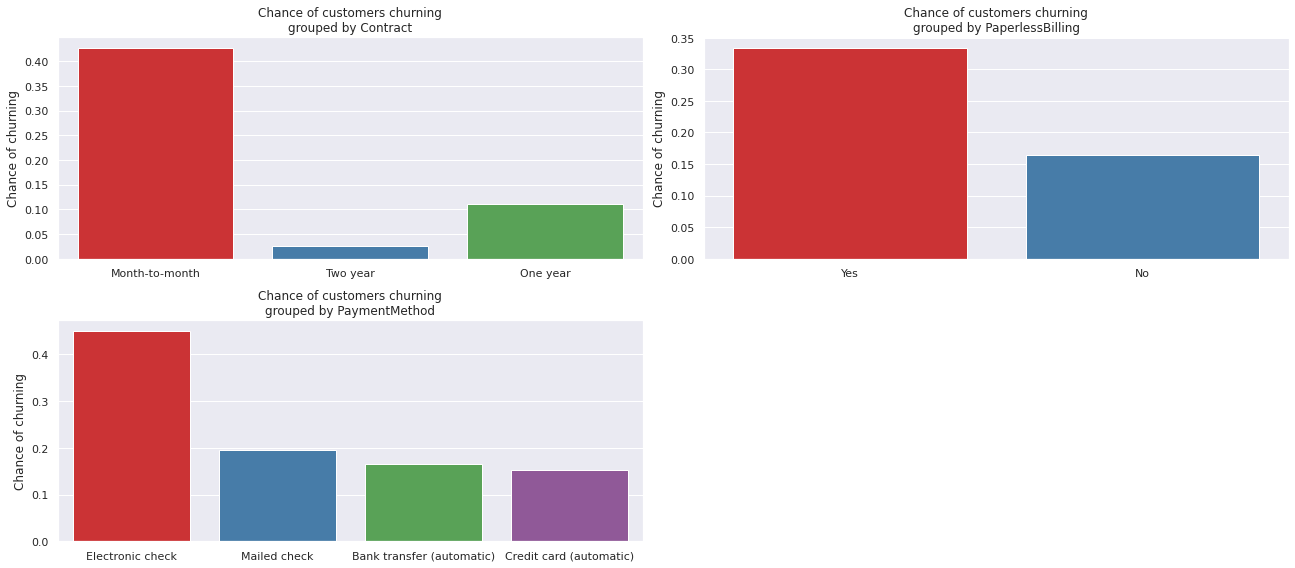

In [32]:
# plot chance of customers churning grouped by basic information
plt.figure(figsize=(18, 8))
for i, col in enumerate(['Contract', 'PaperlessBilling', 'PaymentMethod']):
    sns.barplot(
        data=df_train,
        x=col, y='Churn_Yes',
        order=df_train[col].value_counts().index,
        ci=None,
        ax=plt.subplot(2, 2, i+1)
    )
    plt.title(f'Chance of customers churning\ngrouped by {col}')
    plt.xlabel(None)
    plt.ylabel("Chance of churning")

plt.tight_layout()
plt.show()

It's pretty clear that month-to-month contract is bad for retention, while a two-year contract retain the customers best, with very low chance of churning.\
Customers who pay using electronic check have a higher tendency of stopping their subscription services. This makes sense, since they have to manually pay every month, they might feel more pain when paying and might stop subscribing to cut down their expenses.\
Though I'm quite surprised that customers who pay using mailed check have quite a similar retention to those with automatic payment method

## Tenure, Monthly Charges, and Total Charges

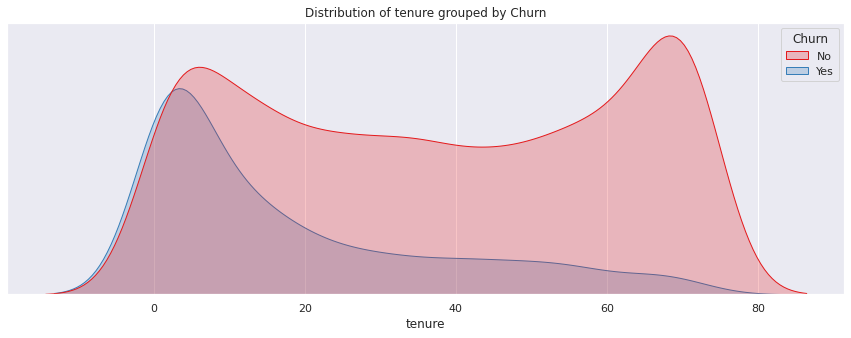

In [33]:
# plot distribution of tenure grouped by Churn
kdeplot(df_train, 'tenure', 'Churn')

We can see that most customers who stopped their subscription, did so on their early months of subscribing.\
It seems that once we get past the one-year mark, which is around 12 months, a customer is most likely to keep their subscription

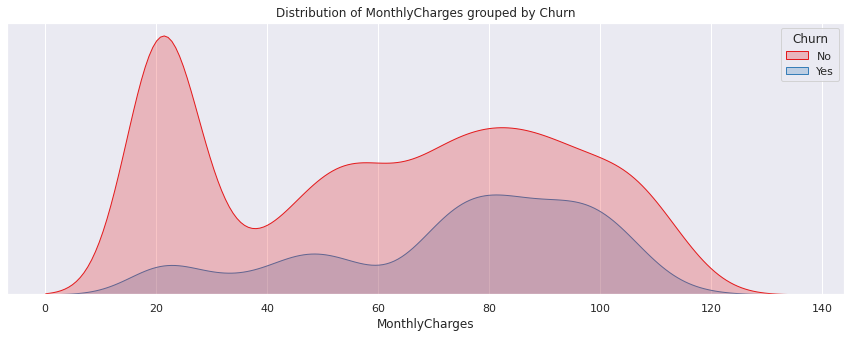

In [34]:
# plot distribution of MonthlyCharges grouped by Churn
kdeplot(df_train, 'MonthlyCharges', 'Churn')

Seems like most customers are charged around $80 per month\
Most customers who are charged around $20 tend to stay with the company more.\
These are definitely not customers who uses multiple lines and fiber optic.\
Maybe these are customers who only subscribes to a single line phone service

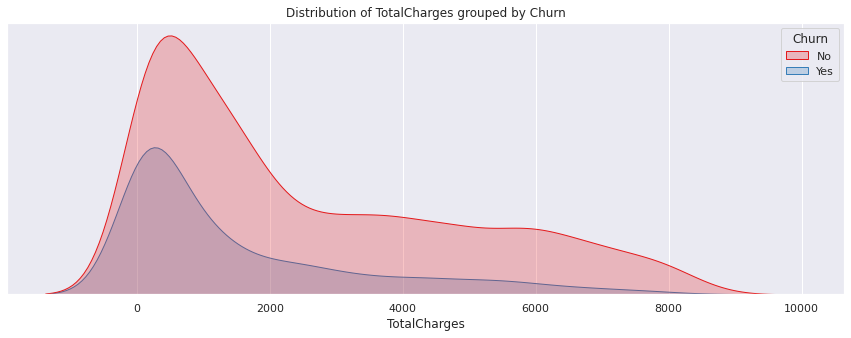

In [35]:
# plot distribution of TotalCharges grouped by Churn
kdeplot(df_train, 'TotalCharges', 'Churn')

There does not seem to be any difference in the distribution of profiles between those customers who churned and those who did not

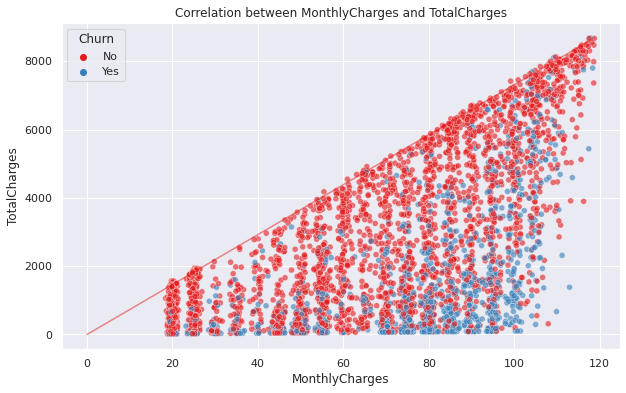

In [36]:
# plot correlation between MonthlyCharges and TotalCharges
plt.figure(figsize=(10, 6))
# plot y=x
plt.plot([0, df_train['MonthlyCharges'].max()], [0, df_train['TotalCharges'].max()], alpha=0.5)
sns.scatterplot(data=df_train, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.6)
plt.title(f'Correlation between MonthlyCharges and TotalCharges')
plt.show()


We can see there's a positive correlation between `MonthlyCharges` and `TotalCharges`, and the amount of `MonthlyCharges` cannot be higher than the amount of `TotalCharges`

In [37]:
# check if there's any MonthlyCharges higher than TotalCharges
df_train[df_train['MonthlyCharges'] > df_train['TotalCharges']]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Yes


Okay. There is none. The premise is correct and the data seems valid

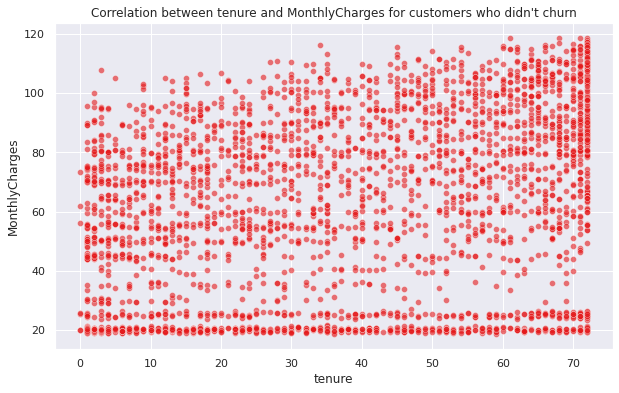

In [38]:
# plot correlation between tenure and MonthlyCharges for customers who didn't churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train[df_train['Churn'] == 'No'], x='tenure', y='MonthlyCharges', alpha=0.6)
plt.title(f"Correlation between tenure and MonthlyCharges for customers who didn't churn")
plt.show()


There doesn't seem to be any relation between `tenure` and `MonthlyCharges` for customers who didn't churn

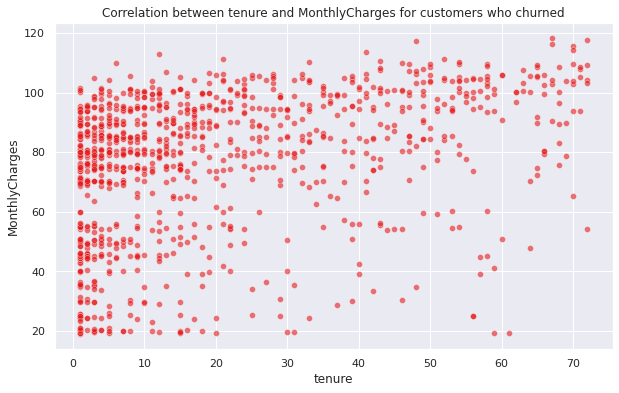

In [39]:
# plot correlation between tenure and MonthlyCharges for customers who churned
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train[df_train['Churn'] == 'Yes'], x='tenure', y='MonthlyCharges', alpha=0.6)
plt.title(f'Correlation between tenure and MonthlyCharges for customers who churned')
plt.show()


The case is pretty different for those who churned though. We can see that there few customers who have a low `MonthlyCharges` and stayed for a long time with the company, but eventually churned.

This could mean that our loyal customers are actually customers who do not spend a lot on `MonthlyCharges` as they can stay a long time with the company and do not churn.

Meanwhile, customers who have high `MonthlyCharges` and high `tenure` could still stop their subscription. This is consistent with what we've seen before that customers who subscribe to Fiber optic have a higher likelihood of churning

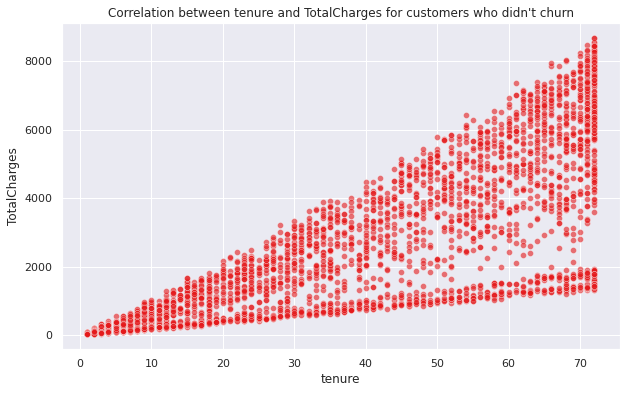

In [40]:
# plot correlation between tenure and TotalCharges for customers who didn't churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train[df_train['Churn'] == 'No'], x='tenure', y='TotalCharges', alpha=0.6)
plt.title(f"Correlation between tenure and TotalCharges for customers who didn't churn")
plt.show()


Clearly, there's a positive correlation between `tenure` and `TotalCharges`

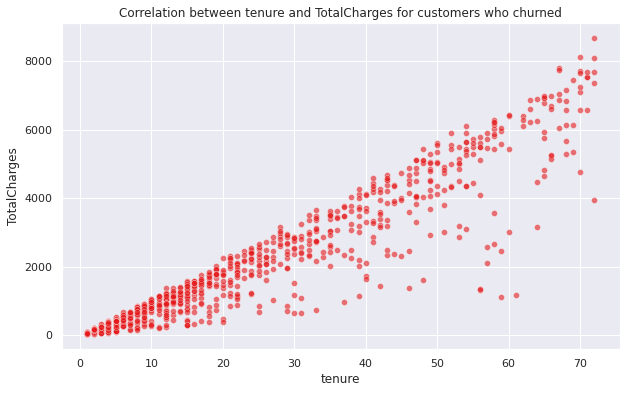

In [41]:
# plot correlation between tenure and TotalCharges for customers who churned
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train[df_train['Churn'] == 'Yes'], x='tenure', y='TotalCharges', alpha=0.6)
plt.title(f"Correlation between tenure and TotalCharges for customers who churned")
plt.show()


We can see here that there are only a few customers who churned after staying with the company for a long time but having a low total charges. This insight is in-line with the insight from `tenure` and `MonthlyCharges`

## Chance of Churning

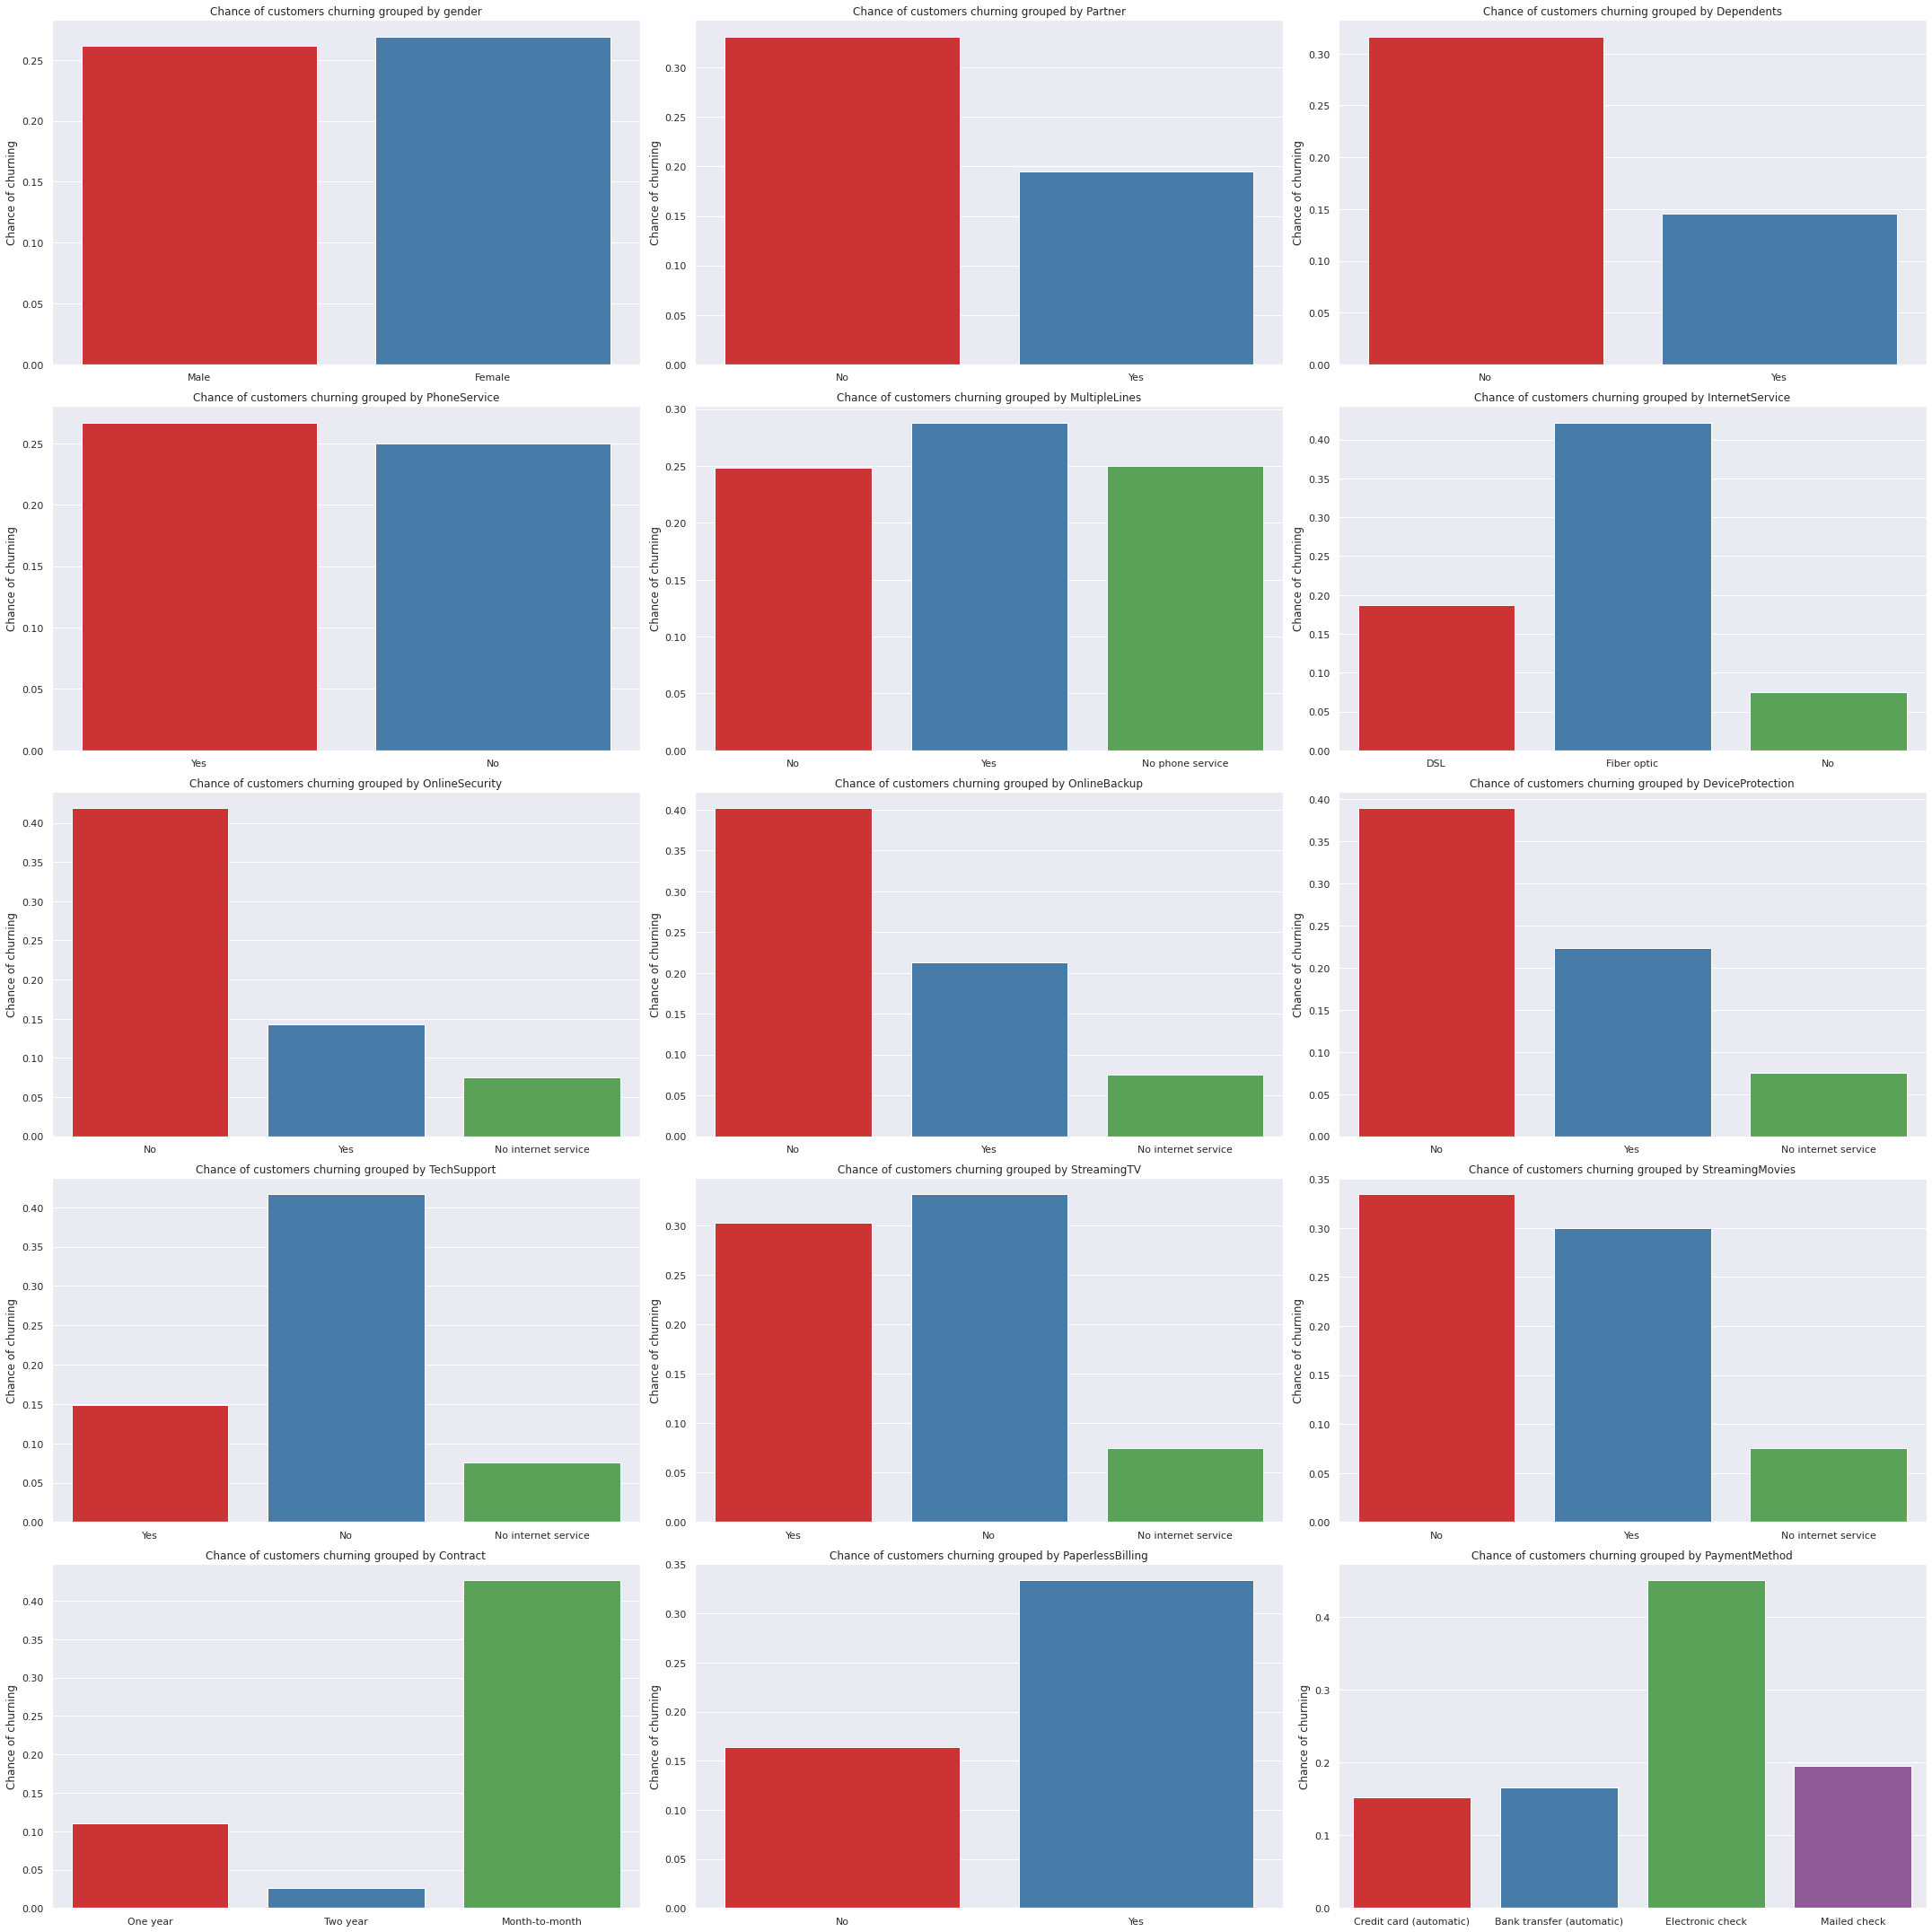

In [42]:
# plot chance of customers churning grouped by InternetService
plt.figure(figsize=(30, 30))

for i, col in enumerate(['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']):
    sns.barplot(
        data=df_train,
        x=col, y='Churn_Yes',
        ci=None,
        ax=plt.subplot(5, 3, i+1)
    )
    plt.title(f'Chance of customers churning grouped by {col}')
    plt.xlabel(None)
    plt.ylabel("Chance of churning")

plt.tight_layout()
plt.show()

- We can see that male and female has about equal chance of churning
- `PhoneService` also has about equal chance of churning
- Just like how it was in `MultipleLines`, where the class `No phone service` is redundant, it seems like in the additional internet services, there's also a redundant class of `No internet service`, as customers who do not have internet service will surely have none of these additional internet services

# 5. Data Preprocessing

In [43]:
# restore the train set from the backup
df_train = df_train_ori.copy()

In [44]:
# split between features and target
X_train = df_train.drop(['Churn'], axis=1)
y_train = df_train['Churn'].copy()

X_test = df_test.drop(['Churn'], axis=1)
y_test = df_test['Churn'].copy()

X_valid = df_valid.drop(['Churn'], axis=1)
y_valid = df_valid['Churn'].copy()

## Categorizing Features

Categorize the features based on the variable type of the features and the data it represents
- Numeric (Interval): Features which have equally spaced interval between unique values
- Categorical (Nominal): Features which have no intrinsic ordering to the unique values
- Ordinal: Features which have clear ordering but do not have equally spaced intervals between unique values

In [45]:
# categorizing features
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

nom_cols = [
    'SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

## Handling Outliers

In [46]:
# check outlier summary only on numerical features
outlier_summary(X_train[num_cols], 1.5)

,feats,skew,dist,tot_outlier,tot_outlier_pct
0,tenure,0.25,normal,0,0.0
1,MonthlyCharges,-0.22,normal,0,0.0
2,TotalCharges,0.95,skewed,0,0.0


1. `Trimming`: if outliers' percentage < 5%
2. `Capping`: if outliers' percentage 5% - 15%
3. `None`: if outliers' percentage > 15%

We have no outliers for the numerical values in the dataset

## Handling Missing Values

In [47]:
# check missing values in train set
check_missing(X_train)

,feats,tot_missing,tot_missing_pct
0,TotalCharges,7,0.16


We have 7 missing values in X_train in `TotalCharges` 

In [48]:
# check missing values in train target
y_train.isna().sum()

0

In [49]:
# check missing values in test set
check_missing(X_test)

,feats,tot_missing,tot_missing_pct
0,TotalCharges,3,0.21


We have 3 missing values in X_test in `TotalCharges` 

In [50]:
# check missing values in test target
y_test.isna().sum()

0

In [51]:
# check missing values in validation set
check_missing(X_valid)

,feats,tot_missing,tot_missing_pct
0,TotalCharges,1,0.09


We have 1 missing values in X_valid in `TotalCharges` 

In [52]:
# check missing values in validation target
y_test.isna().sum()

0

Let's look further into the missing values

In [53]:
# display missing values in train set
X_train[X_train['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN


It seems that all missing values have the `tenure 0`. Let's check if this premise is correct

In [54]:
# check if missing values instances are the same with `0` tenure instances
X_train[X_train['TotalCharges'].isna()].equals(X_train[X_train['tenure'] == 0])

True

So the premise is correct and all `0 tenure` does not have any `TotalCharges` values.\
It seems like these are instances for customers who subscribed to the services for less than a month\
However, we can see that they still have some `MonthlyCharges`. Meaning, they were still charged for the services they used\
Therefore, I'm going to impute `TotalCharges` with the value from `MonthlyCharges`

In [55]:
# impute missing values in `TotalCharges` with values from `MonthlyCharges`
X_train = impute_total_charges(X_train)
X_test = impute_total_charges(X_test)
X_valid = impute_total_charges(X_valid)

Let's make sure there are no missing values now

In [56]:
# check missing values in train set
check_missing(X_train)

,feats,tot_missing,tot_missing_pct


In [57]:
# check missing values in test set
check_missing(X_test)

,feats,tot_missing,tot_missing_pct


In [58]:
# check missing values in valid set
check_missing(X_valid)

,feats,tot_missing,tot_missing_pct


Great! We have no more missing values

## Handling Cardinality

During the EDA, I found some categories that I feel were redundant, as these informations can easily be substituted by filtering the parent feature, which is `PhoneService` and `InternetService`. Therefore, I'm going to replace these categories with `No`

In [59]:
# replace 'No internet service' and 'No phone service' with 'No'
X_train = impute_no_phone_internet(X_train)
X_test = impute_no_phone_internet(X_test)
X_valid = impute_no_phone_internet(X_valid)

## Feature Selection

### Heatmap Correlation Matrix for Features with Number dtypes

We look at the Spearman's correlation matrix to find out the relation between features and target

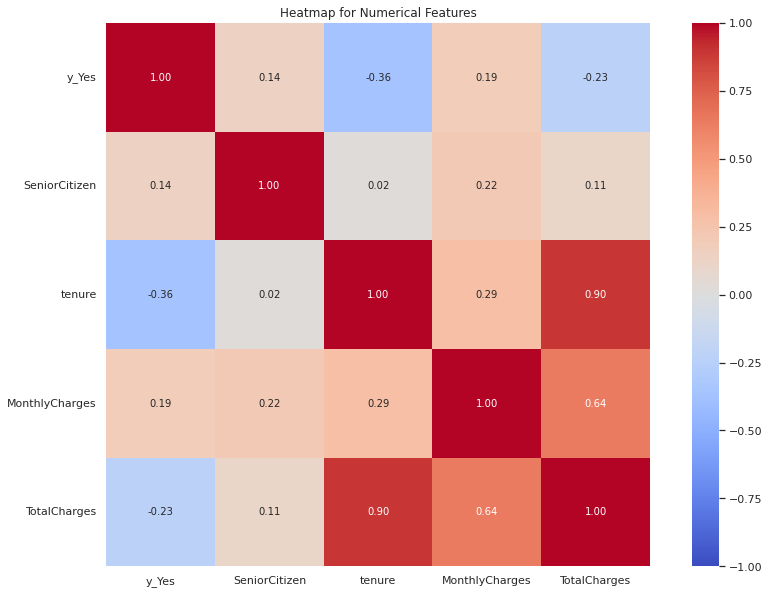

In [60]:
# Heatmap Correlation Matrix
plt.figure(figsize=(15,10))

sns.heatmap(
    pd.concat([
        pd.get_dummies(y_train, prefix='y', drop_first=True),
        X_train.select_dtypes('number')], axis=1
    ).corr('spearman'),
    annot=True, vmin=-1, vmax=1, fmt='.2f', square=True, cmap='coolwarm')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Heatmap for Numerical Features')

plt.show()


- `y_yes` is a dummy variable which represents the target, with a value of `0 being no and 1 being yes`
- There are low spearman correlations amongst features and target, with the highest being `tenure`. This is consistent with our EDA that customers who stopped their subscriptions, tend to do so in their early months
- We can see that `tenure` and `TotalCharges` are highly correlated. This makes sense, since the longer a customer subscribes, the higher the total charges will be
- `MonthlyCharges` and `TotalCharges` are also highly correlated. This makes sense, since `TotalCharges` are cumulative of multiples of `MonthlyCharges`
- Therefore, I'm going to exclude `TotalCharges` as a predictor, since both `tenure` and `MonthlyCharges` represent similar information

### Categorizing Selected Features

In [61]:
# display outlier summary
outlier_summary(X_train[num_cols], 1.5).sort_values(by='dist')

,feats,skew,dist,tot_outlier,tot_outlier_pct
0,tenure,0.25,normal,0,0.0
1,MonthlyCharges,-0.22,normal,0,0.0
2,TotalCharges,0.95,skewed,0,0.0


In [62]:
# create list of numerical features with normal distribution
num_cols_norm = ['tenure', 'MonthlyCharges']

# create list of numerical features with skewed distribution
num_cols_skew = []

# create final list of nominal features
nom_cols = [
    'SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

Great! We have finalized our feature list.
We also separated numerical features with different types of distribution just in case we want to scale them using different methods

### List of Features

These are the predictors we're going to use

In [63]:
# print out list of predictors
print('Numerical Features:')
print(num_cols_norm + num_cols_skew)
print('=' * 50)
print('Categorical Features:')
print(nom_cols)

Numerical Features:
['tenure', 'MonthlyCharges']
Categorical Features:
['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


## Feature Engineering

### Prepare The Necessary Objects

Declare the various objects, like scaler and encoder we might use
- All categorical features will use one hot encoder

In [64]:
# declare standard scaler
std_sc = StandardScaler()

# declare min max scaling
mm_sc = MinMaxScaler()

# declare one hot encoder
ohe_enc = OneHotEncoder(handle_unknown='ignore')

# declare label encoder
label_enc = LabelEncoder()

Create ColumnTransformer, SMOTENC objects
- In ColumnTransformer, we will design so that our dataset will have the categorical features lined up after the numerical ones

In [65]:
# create column transformer object using min max scaler
scale_mm = ColumnTransformer([
    ('num_norm', std_sc, num_cols_norm),
    ('num_skew', mm_sc, num_cols_skew),
    ('nom', 'passthrough', nom_cols),
])

# create column transformer object for use after oversampling
encode = ColumnTransformer([
    ('num', 'passthrough', slice(0, 2)),
    ('nom', ohe_enc, slice(2, 18)),
])

# create smotenc object
# categorical features will be put at the end, after the numerical ones
smotenc = SMOTENC(
    categorical_features= list(range(2, 18)),
    random_state=42
)

### Scaling

We need to scale all numerical columns before oversampling

In [66]:
# scale numeric features 
X_train_scaled = scale_mm.fit_transform(X_train)
X_test_scaled = scale_mm.transform(X_test)
X_valid_scaled = scale_mm.transform(X_valid)

# print shape
print('X_train_scaled shape:', X_train_scaled.shape)
print('X_test_scaled shape:', X_test_scaled.shape)
print('X_valid_scaled shape:', X_valid_scaled.shape)

X_train_scaled shape: (4507, 18)
X_test_scaled shape: (1409, 18)
X_valid_scaled shape: (1127, 18)


### Oversampling

Since our data is imbalance, we need to perform oversampling

In [67]:
# oversampling using SMOTE
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_scaled, y_train)

# print shape after oversampling
print('X_train_balanced shape:', X_train_balanced.shape)
print('y_train_balanced shape:', y_train_balanced.shape)

X_train_balanced shape: (6622, 18)
y_train_balanced shape: (6622,)


### Encoding

In [68]:
# encode categorical features
X_train_encoded = encode.fit_transform(X_train_balanced)
X_test_encoded = encode.transform(X_test_scaled)
X_valid_encoded = encode.transform(X_valid_scaled)

# encode labels
y_train_final = label_enc.fit_transform(y_train_balanced)
y_test_final = label_enc.transform(y_test)
y_valid_final = label_enc.transform(y_valid)

# print shape
print('X_train_encoded shape:', X_train_encoded.shape)
print('X_test_encoded shape:', X_test_encoded.shape)
print('X_valid_encoded shape:', X_valid_encoded.shape)
print('y_train_final shape:', y_train_final.shape)
print('y_test_final shape:', y_test_final.shape)
print('y_valid_final shape:', y_valid_final.shape)

X_train_encoded shape: (6622, 38)
X_test_encoded shape: (1409, 38)
X_valid_encoded shape: (1127, 38)
y_train_final shape: (6622,)
y_test_final shape: (1409,)
y_valid_final shape: (1127,)


In [69]:
# finalize training and test sets and make sure they're float
X_train_final = X_train_encoded.astype(np.float32)
X_test_final = X_test_encoded.astype(np.float32)
X_valid_final = X_valid_encoded.astype(np.float32)

# print shape and dtype
print('X_train_final shape and dtype:', X_train_final.shape, X_train_final.dtype)
print('X_test_final shape and dtype:', X_test_final.shape, X_test_final.dtype)
print('X_valid_final shape and dtype:', X_valid_final.shape, X_valid_final.dtype)
print('y_train_final shape and dtype:', y_train_final.shape, y_train_final.dtype)
print('y_test_final shape and dtype:', y_test_final.shape, y_test_final.dtype)
print('y_valid_final shape and dtype:', y_valid_final.shape, y_valid_final.dtype)

X_train_final shape and dtype: (6622, 38) float32
X_test_final shape and dtype: (1409, 38) float32
X_valid_final shape and dtype: (1127, 38) float32
y_train_final shape and dtype: (6622,) int64
y_test_final shape and dtype: (1409,) int64
y_valid_final shape and dtype: (1127,) int64


Preprocessing is finished

# 6. Model Definition

- Target: Predicting whether the client would stop their subscription and leave the company

    The target that we're going to predict is a label, which means we are going to make a classification model.
    In this case, we want to minimize the situation in which we incorrectly predicts a customers won't stop their subscription (when the client is in fact will), or as in the statistical term, **False Negatives**.

    This prediction is made so that we can identify our customers and contact them to find out their needs and concerns as to why they might churn. This way, we can find out what to do and how to improve our services, so we may prevent them from churning.\

    We don't want to classify a customer as not likely to churn and have a false sense of security, only to find out soon after when they're stopping the subscription.

- Predictors: The features I'm going to use are
    - Numerical Features:
        - ['tenure', 'MonthlyCharges']
    - Categorical Features:
        - ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


- Models: I'm going to use Neural Network algorithm using keras

In [70]:
# create tf dataset instance 
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train_final)).batch(128)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test_final)).batch(128)
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid_final, y_valid_final)).batch(128)

2022-06-16 12:09:17.912428: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Sequential API

Running this model as minimal as possible. Using 1 hidden layer with 8 neurons

In [71]:
# declare keras model using Sequential API
model_seq = keras.Sequential([
    keras.layers.Dense(units=8, activation='relu', input_shape=X_train_final.shape[1:]),
    keras.layers.Dense(units=1, activation='sigmoid'),
])

# compile model
model_seq.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# display model summary for sequential model
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 312       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


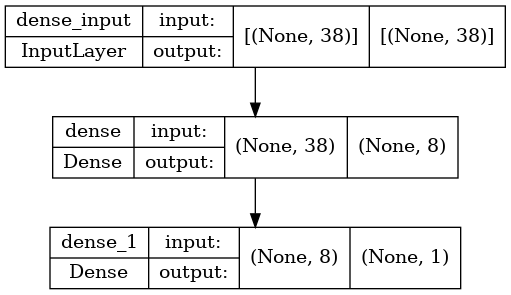

In [72]:
# plot model architecture
keras.utils.plot_model(model_seq, to_file='report/model_seq.png', show_shapes=True)

## Functional API

Running this model as minimal as possible with the same hyperparameter as the sequential one. Using 1 hidden layer with 8 neurons

In [73]:
# declare keras model using functional API
input_ = keras.layers.Input(shape=X_train_final.shape[1:])
hidden_1 = keras.layers.Dense(units=8, activation='relu')(input_)
output = keras.layers.Dense(units=1, activation='sigmoid')(hidden_1)
model_func = keras.Model(inputs=input_, outputs=output)

# compile model
model_func.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# display model summary for functional model
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense_2 (Dense)             (None, 8)                 312       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


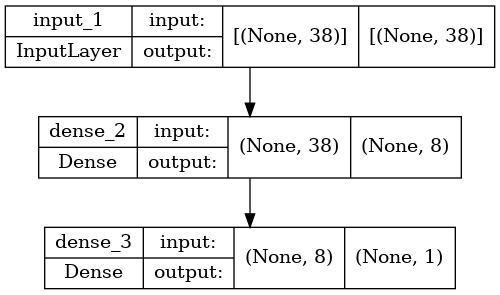

In [74]:
# plot model architecture
keras.utils.plot_model(model_func, to_file='report/model_func.png', show_shapes=True)

## Tuning Sequential API

Attempting to improve the sequential model using initializer, regularizer, and also dropout

In [75]:
# declare keras model using Sequential API
model_seq_tuned = keras.Sequential([
    keras.layers.Dense(
        units=8,
        activation='relu',
        input_shape=X_train_final.shape[1:],
        kernel_initializer=keras.initializers.he_normal(seed=42),
        kernel_regularizer=keras.regularizers.l2(0.01)
    ),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(units=1, activation='sigmoid'),
])

# compile model
model_seq_tuned.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

# display model summary for sequential model
model_seq_tuned.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 312       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


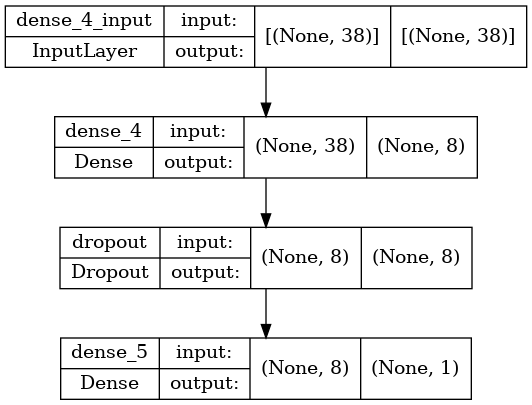

In [76]:
# plot model architecture
keras.utils.plot_model(model_seq_tuned, to_file='report/model_seq_tuned.png', show_shapes=True)

## Tuning Functional API

Attempting to improve the model using initializer, regularizer, and also dropout. Same hyperparameter as the sequential one

In [77]:
# declare keras model using functional API
input_ = keras.layers.Input(shape=X_train_final.shape[1:])
hidden_1 = keras.layers.Dense(
    units=8,
    activation='relu',
    kernel_initializer=keras.initializers.he_normal(seed=42),
    kernel_regularizer=keras.regularizers.l2(0.01)
)(input_)
dropout_1 = keras.layers.Dropout(rate=0.2)(hidden_1)
output = keras.layers.Dense(units=1, activation='sigmoid')(dropout_1)
model_func_tuned = keras.Model(inputs=input_, outputs=output)

# compile model
model_func_tuned.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

# display model summary for functional model
model_func_tuned.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense_6 (Dense)             (None, 8)                 312       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


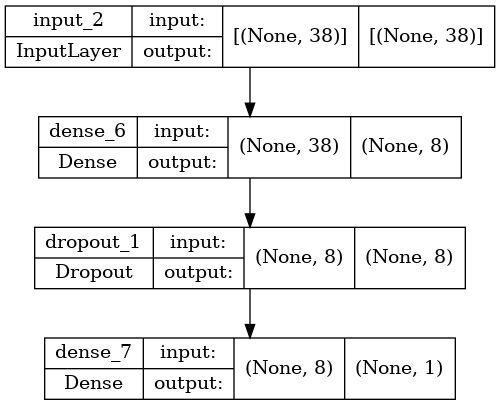

In [78]:
# plot model architecture
keras.utils.plot_model(model_func_tuned, to_file='report/model_func_tuned.png', show_shapes=True)

## Additional objects

In [79]:
# define callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# 7. Model Training

In [80]:
# create dictionary of models
models = {
    'sequential': model_seq,
    'sequential_tuned': model_seq_tuned,
    'functional': model_func,
    'functional_tuned': model_func_tuned
}

In [81]:
%%time

# create dictionary to store metrics
metrics = {}

# loop through models and train
for name, model in models.items():
    # train model
    history = model.fit(
        train_dataset,
        epochs=30,
        validation_data=valid_dataset,
        callbacks=[early_stopping_cb],
        verbose=0
    )

    # store metrics
    metrics[name] = pd.DataFrame(history.history)

CPU times: user 14.1 s, sys: 3.82 s, total: 18 s
Wall time: 11.8 s


# 8. Model Evaluation

In [82]:
# create dictionary to store evaluation metrics
eval_metrics = {
    'sequential': {},
    'sequential_tuned': {},
    'functional': {},
    'functional_tuned': {}
}

# loop through models and evaluate them
for name, model in models.items():
    # evaluate model
    eval_metrics[name]['loss'], eval_metrics[name]['accuracy'] = model.evaluate(
        test_dataset,
        verbose=0
    )

# create dataframe from evaluation metrics
eval_metrics_df = pd.DataFrame(eval_metrics).T

# display evaluation metrics
eval_metrics_df

,loss,accuracy
sequential,0.51,0.75
sequential_tuned,0.55,0.74
functional,0.51,0.74
functional_tuned,0.55,0.72


We can see that the loss actually increased after being tuned. The accuracy also slightly decreased

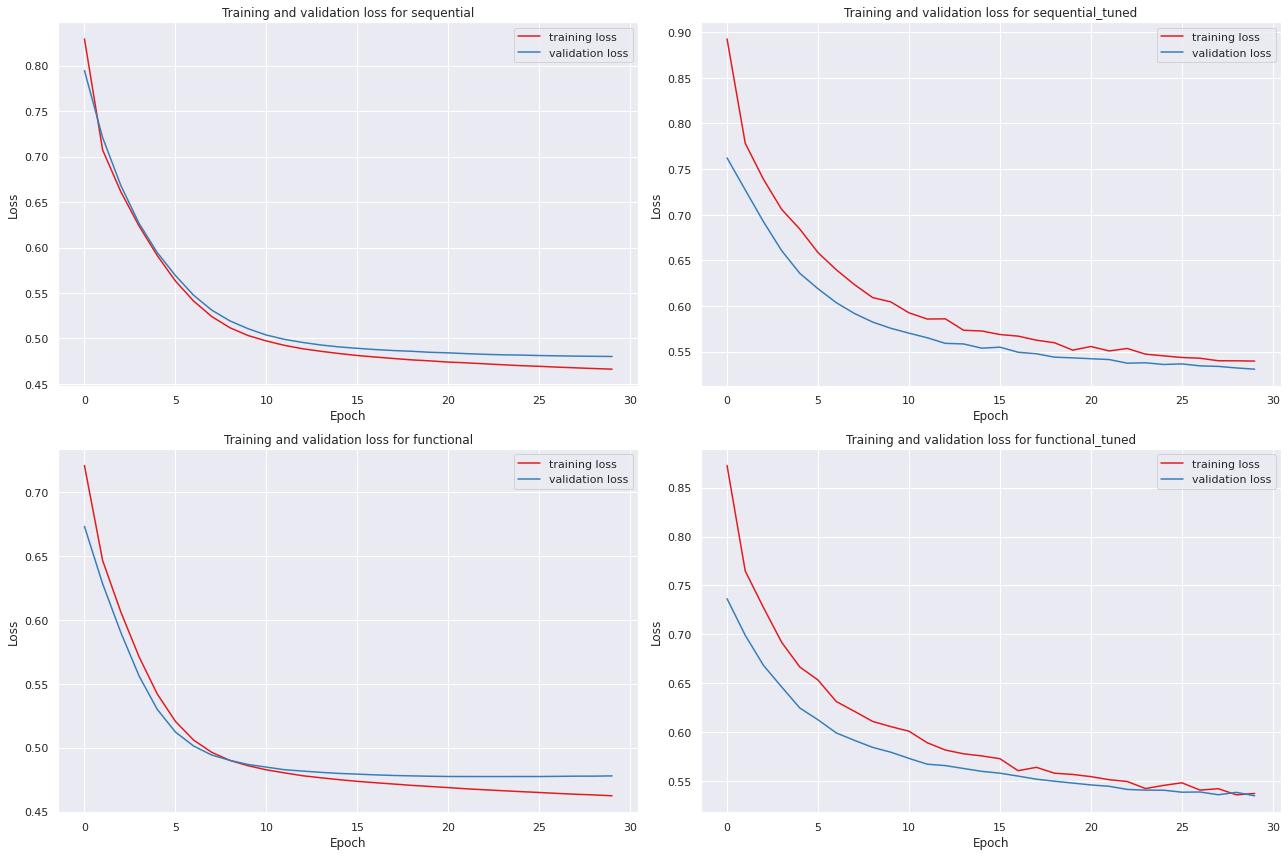

In [83]:
plt.figure(figsize=(18, 12))

# plot the loss curves
for i, (name, metric) in enumerate(metrics.items()):
    plt.subplot(2, 2, i + 1)
    plot_loss(metric)
    plt.title(f'Training and validation loss for {name}')

plt.tight_layout()
plt.show()

- Even though the sequential and functional model uses the same hyperparameter, the results are actually slightly different
- We can see from the graph, that the functional model is a bit overfitted as we started to see the gap widening the higher the epoch.
- The sequential model also had a widening of the gap, albeit more subtly.
- The tuned models, be it sequential or functional are now a much more better fit, we could even call it a good fit. We also have the validation loss to be slightly lower than the training loss.
- We do have to note though that the absolute value of the loss increased after tuning. So we still have to see how it performs when we use it to predict the test set

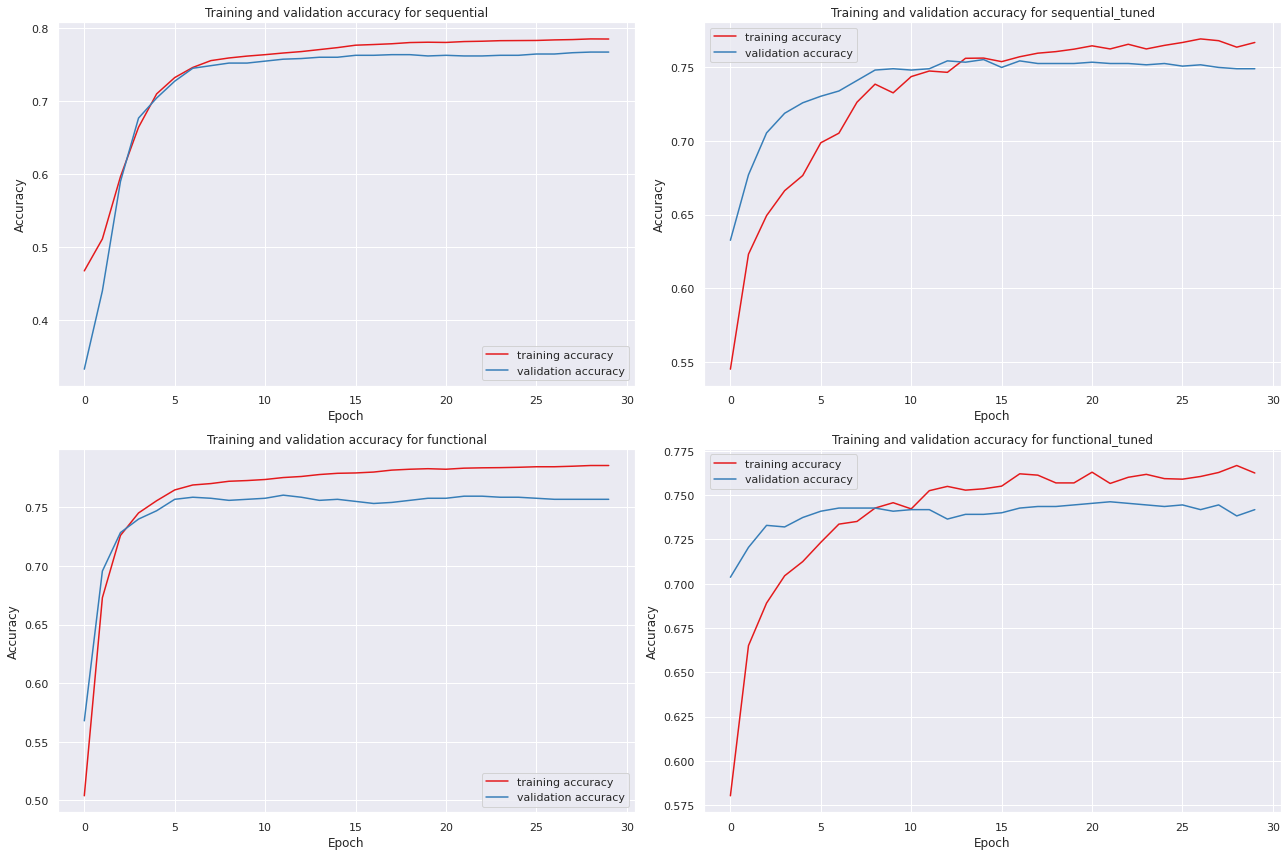

In [84]:
plt.figure(figsize=(18, 12))

# plot the accuracy curves
for i, (name, metric) in enumerate(metrics.items()):
    plt.subplot(2, 2, i + 1)
    plot_acc(metric)
    plt.title(f'Training and validation accuracy for {name}')

plt.tight_layout()
plt.show()

- We can see that the accuracy also somewhat decreased after tuning
- The validation accuracy for the tuned models are quite high from the start but didn't increase much as it stabilized later on

## Prepare Evaluation

In [85]:
# set threshold for prediction
threshold = 0.5

# create dictionary to store predictions:
predictions = {
    'sequential': {},
    'sequential_tuned': {},
    'functional': {},
    'functional_tuned': {},    
}

# loop through models and make predictions
for name, model in models.items():
    # make predictions for training set
    pred_train = model.predict(X_train_final).reshape(-1)
    pred_train = np.where(pred_train > threshold, 1, 0)

    # make predictions for test set
    pred_test = model.predict(X_test_final).reshape(-1)
    pred_test = np.where(pred_test > threshold, 1, 0)

    # store predictions in dictionary
    predictions[name]['train'] = pred_train
    predictions[name]['test'] = pred_test

In [86]:
# prepare target names for classification report
target_names = ["Not Churn", "Churn"]

## Sequential API Evaluation

In [87]:
# print classification report for sequential API
for name, preds in predictions.items():
    if 'sequential' not in name:
        continue
    for dataset, pred in preds.items():
        if dataset == 'train':
            print(f'{name} classification report for training set:')
            print(classification_report(y_train_final, pred, target_names=target_names))
        if dataset == 'test':
            print(f'{name} classification report for testing set:')
            print(classification_report(y_test_final, pred, target_names=target_names))

sequential classification report for training set:
              precision    recall  f1-score   support

   Not Churn       0.81      0.76      0.79      3311
       Churn       0.78      0.83      0.80      3311

    accuracy                           0.79      6622
   macro avg       0.79      0.79      0.79      6622
weighted avg       0.79      0.79      0.79      6622

sequential classification report for testing set:
              precision    recall  f1-score   support

   Not Churn       0.90      0.75      0.82      1035
       Churn       0.52      0.76      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.75      0.76      1409

sequential_tuned classification report for training set:
              precision    recall  f1-score   support

   Not Churn       0.82      0.73      0.77      3311
       Churn       0.76      0.84      0.80      3311

    accuracy            

- We can now see clearly that both model are not actually a very good fit. I don't think it can be called overfit either though. So I'd call it a decent fit, but it sure could be improved, as there is a `0.04` gap between training accuracy and testing accuracy
- We can also see that tuning the model successfully increased the recall score. This is important to us as we want to minimize **False Negatives**, since we need to detect potential of churning as much as possible.
- The tuned recall score is `0.79` which is quite decent
- Therefore, our model could be run on inference, but we should also strive to improve this model further

## Functional API Evaluation

In [88]:
# print classification report for functional API
for name, preds in predictions.items():
    if 'functional' not in name:
        continue
    for dataset, pred in preds.items():
        if dataset == 'train':
            print(f'{name} classification report for training set:')
            print(classification_report(y_train_final, pred, target_names=target_names))
        if dataset == 'test':
            print(f'{name} classification report for testing set:')
            print(classification_report(y_test_final, pred, target_names=target_names))

functional classification report for training set:
              precision    recall  f1-score   support

   Not Churn       0.82      0.75      0.78      3311
       Churn       0.77      0.84      0.80      3311

    accuracy                           0.79      6622
   macro avg       0.80      0.79      0.79      6622
weighted avg       0.80      0.79      0.79      6622

functional classification report for testing set:
              precision    recall  f1-score   support

   Not Churn       0.90      0.73      0.81      1035
       Churn       0.51      0.77      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.76      1409

functional_tuned classification report for training set:
              precision    recall  f1-score   support

   Not Churn       0.85      0.70      0.77      3311
       Churn       0.75      0.87      0.81      3311

    accuracy            

- The fit situation is quite similar with the sequential models. However, the fit in the tuned model actually became even wider, with a `0.07` gap between training accuracy and testing accuracy
- Tuning the model increased the recall score substantially to `0.82`, which is good
- So this model is also good, but I'm quite concerned with the wider gap indicating overfit.

## Analysis
- Tuning successfully increased the recall score
- The fit on the functional_tuned model actually became wider, indicating that the fit became a tad worse
- Therefore, considering the fit and also the recall score, I'm choosing the **sequential_tuned** model as the best model to be saved and run

## Save The Final Model

In [89]:
# prepare directory for saving model
model_dir = 'models'
scaler_name = 'scaler.pkl'
encoder_name = 'encoder.pkl'
model_name = 'keras_model.h5'

# create directory if it does not exist
Path(model_dir).mkdir(parents=True, exist_ok=True)

scaler_path = Path(model_dir, scaler_name)
encoder_path = Path(model_dir, encoder_name)
model_path = Path(model_dir, model_name)

# save model
joblib.dump(scale_mm, scaler_path)
joblib.dump(encode, encoder_path)
model_seq_tuned.save(model_path)

# 9. Model Inference

## Load The Model

In [90]:
# model location
model_dir = 'models'
scaler_name = 'scaler.pkl'
encoder_name = 'encoder.pkl'
model_name = 'keras_model.h5'

# create path object
scaler_path = Path(model_dir, scaler_name)
encoder_path = Path(model_dir, encoder_name)
model_path = Path(model_dir, model_name)

# load model
scaler = joblib.load(scaler_path)
encoder = joblib.load(encoder_path)
model = keras.models.load_model(model_path)

## Prepare Data For Inferencing

In [91]:
# prepare data for inferencing
new_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 12,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 50,
    'TotalCharges': 600,
}

new_data_2 = {
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 41,
    'PhoneService': 'Yes',
    'MultipleLines': 'Yes',
    'InternetService': 'No',
    'OnlineSecurity': 'No internet service',
    'OnlineBackup': 'No internet service',
    'DeviceProtection': 'No internet service',
    'TechSupport': 'No internet service',
    'StreamingTV': 'No internet service',
    'StreamingMovies': 'No internet service',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Bank transfer (automatic)',
    'MonthlyCharges': 25.25,
    'TotalCharges': 996.45,
}


# create a list for each value in the data dictionary
for key, value in new_data.items():
    new_data[key] = [value]
    
# append new values to the data dictionary
for key, value in new_data.items():
    value.append(new_data_2[key])

# create dataframe for inferencing
new_data = pd.DataFrame(new_data)

In [92]:
# display dataframe for inferencing
new_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,12,No,No phone service,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,50.00,600.00
1,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45


## Inferencing

In [93]:
# impute missing values
new_data_prepared = impute_total_charges(new_data)

# impute no phone service and no internet service with no
new_data_prepared = impute_no_phone_internet(new_data_prepared)

# print shape of prepared data
print(new_data_prepared.shape)

(2, 19)


In [94]:
%%time

# set threshold for prediction
threshold = 0.5

# scale inference set
new_data_scaled = scaler.transform(new_data_prepared)

# encode inference set
new_data_encoded = encoder.transform(new_data_scaled)

# cast as float32
new_data_final = new_data_encoded.astype(np.float32)

# predict inference set using the final model
y_pred_new = model.predict(new_data_final).reshape(-1)
y_pred_new = np.where(y_pred_new > threshold, 1, 0)

CPU times: user 85.1 ms, sys: 43.9 ms, total: 129 ms
Wall time: 121 ms


In [95]:
# create dataframe with predictions
new_data['pred'] = y_pred_new

# display inference set
new_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,pred
0,Female,0,Yes,No,12,No,No phone service,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,50.00,600.00,1
1,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,0


Model successfully run on inference dataset

# 10. Conclusion

## On EDA
- Most customers do not churn. Only around 30% customers eventually leave the company. This is pretty good, but we should strive to decrease it
- The number of customers who are male are about equal to those who are female, and they have similar likelihood of churning
- There are more Non-Senior citizens than Seniors and the Senior Citizens are more likely to churn
- The number of customers who have a partner and those who don't are about equal. Customers who do not have a partner are more likely to churn
- Most customers do not have any dependents. Customers who do not have dependents are more likely to churn
- The majority of our customers subscribe to a Phone Service.
- All customers who do not subscribe to a Phone Service, subscribes to DSL internet service
- Those who subscribe to a Phone Service, usually have a Fiber optic as well. This might be a packaged deal where a fiber optic users get a free or discounted phone service
- However, customers who use Fiber optic have about double the likelihood of churning compared to customers who use DSL, and about five times to that of  cutomers who only have a phone service
- Most customers do not have multiple phone lines
- The majority of our customers who have multiple phone lines, uses fiber optic internet service
- Most people who use DSL do not subscribe to additional services.  However, we do have to note that the number of customers who subscribe to online security and tech support are also about equal to those who don't
- Contrary to the DSL users, most Fiber optic users do not subscribe to online security and tech support. Is this because Fiber optic is less prone to cyber attacks, so they opted out of those additional services? We need more information on this. We could ask the online security specialist
- Fiber optics customers tend to subscribe to third-party streaming TV and streaming Movies services. This might be because they have faster, more reliable internet connection and they're also more well-off. So they want better entertainment
- Most people are on a month-to-month contract. I don't think this is a good way to retain customers, as shown that they have a higher likelihood of churning
- Customers on a two-year contract retain the customers best, with very low chance of churning.
- Most people use paperless billing and it also has a higher chance of churning compared to those who use paper billing.
- Most people use electronic check as their payment method. This isn't good for customer retention as the customers using this payment method have a higher likelihood of churning
- The data design have some of what I would deemed redundant categories like `No phone service` and `No internet service`, as these can be implied by the situation of their respective parent features of `PhoneService` and `InternetService`. However, separating them like that does make the data easier to be seen and analyze at a glance

## On Modeling
- The data is very imbalance. Hence the need for oversampling
- All the models have quite a decent fit, be it the base or the tuned models. However, the functional model actually became slightly more overfit after tuning, even though it did increase the recall score quite moderately
- Tuning also successfully increased the recall score, which is the metric we deemed important in this research
- Therefore, our model is quite okay with a `79%` recall score.

## Implication
- We cannot please everybody. However, we should still strive to be the best solution for our customers as a phone and internet service providers
- By learning from data, we can predict whether a client is dissatisfied with our services and more likely to stop their subscriptions
- This way, we can identify our customers and contact them to find out their needs and concerns as to why they might churn. Then, we can find out what to do and how to improve our services, so we may prevent them from churning.
- However, we want to minimize the event where we misclassify a customer as unlikely to churn, and have a false sense of security, while in all actuality, we should contact them right away and attempt to find out what's wrong, then retain them. This event, in statistical term, is called *False Negative*. This is the event we want to minimize
- Our model is quite decent at predicting this, having only a `79%` rate, so it may be run, but we still need to aim to improve it gradually
- Contact those customers who are more likely to churn and offer them to:
  - Switch to a two-year contract
  - Switch to automatic bank transfer or credit card payment method
  - If they still want to stop their subscriptions, offer them some kind of promotions or discounts while pushing them to use the two options mentioned above. The promotions and discounts will have to be discussed by the marketing department
  - Offer them to downgrade to a phone only service. This way we can still retain the clients 
  - Ask for feedback on what we can improve from our services

## Future Improvement
- Consider adding more data so the model could learn more
- Consider tweaking other hyperparameters like learning rate, batch normalization, optimizers, and so on
- Consider dropping some features which might not be significant to the target variable, such as `gender`, where each gender have about equal chance of churning
- Consider dropping some features which might be related to each other. Like the additional internet services, such as `StreamingTV` and `StreamingMovies`
- Consider keeping the deemed-redundant categories of `No phone service` and `No internet service`